<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.preprocessing import OneHotEncoder

import seaborn
seaborn.set_context('talk')

In [ ]:
# Se lee el data set directamente desde drive, guardado anteriormente
url = 'https://drive.google.com/file/d/1dXCvs7XkqgTYdck9st0ldFx2ryj3OSsj/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
melb_df = pd.read_csv(dwn_url)
melb_df[:3]

,Price,Suburb,Distance,Regionname,Postcode,Landsize,BuildingArea,Rooms,Bathroom,Car,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,review_scores_value_mean,review_scores_location_mean
0,1480000.0,Abbotsford,2.5,Northern Metropolitan,3067.0,202.0,NaN,2,1.0,1.0,NaN,3067.0,130.624031,258.0,9.572115,9.697115
1,1035000.0,Abbotsford,2.5,Northern Metropolitan,3067.0,156.0,79.0,2,1.0,0.0,1900.0,3067.0,130.624031,258.0,9.572115,9.697115
2,1465000.0,Abbotsford,2.5,Northern Metropolitan,3067.0,134.0,150.0,3,2.0,0.0,1900.0,3067.0,130.624031,258.0,9.572115,9.697115


In [ ]:
melb_df.describe()

,Price,Distance,Postcode,Landsize,BuildingArea,Rooms,Bathroom,Car,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,review_scores_value_mean,review_scores_location_mean
count,1.111600e+04,11116.000000,11116.000000,11116.000000,5780.000000,11116.000000,11116.000000,11058.000000,6574.000000,11102.000000,11102.000000,11102.000000,11102.000000,11102.000000
mean,1.125082e+06,10.588980,3100.189187,508.604354,155.206224,3.102735,1.572148,1.690089,1961.730453,3100.176004,126.952590,120.234913,9.499291,9.437423
std,5.513389e+05,5.135677,78.368112,317.180795,133.780408,0.875553,0.690475,0.982755,38.016632,78.379719,64.579604,172.313667,0.232767,0.300800
min,3.010000e+05,1.800000,3000.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1196.000000,3000.000000,43.500000,3.000000,7.500000,7.500000
25%,7.228750e+05,7.000000,3044.000000,265.000000,105.000000,3.000000,1.000000,1.000000,1935.000000,3044.000000,94.156028,40.000000,9.440678,9.297753
50%,9.800000e+05,10.400000,3081.000000,524.000000,134.000000,3.000000,1.000000,2.000000,1965.000000,3081.000000,113.142857,68.000000,9.543601,9.444444
75%,1.400000e+06,13.500000,3146.000000,665.000000,181.000000,4.000000,2.000000,2.000000,1995.000000,3146.000000,135.833333,133.000000,9.615385,9.640719
max,3.335000e+06,31.700000,3802.000000,2927.000000,6791.000000,10.000000,8.000000,10.000000,2018.000000,3802.000000,759.083333,3367.000000,10.000000,10.000000


In [ ]:
columnas = list(melb_df.columns)
columnas

['Price',
 'Suburb',
 'Distance',
 'Regionname',
 'Postcode',
 'Landsize',
 'BuildingArea',
 'Rooms',
 'Bathroom',
 'Car',
 'YearBuilt',
 'zipcode',
 'airbnb_price_mean',
 'airbnb_record_count',
 'review_scores_value_mean',
 'review_scores_location_mean']

### Analisis de datos erroneos y faltantes

In [ ]:
#1
except_b_y = ['Price', 'Suburb', 'Distance', 'Regionname', 'Postcode', 'Landsize',
 'Rooms', 'Bathroom','Car', 'zipcode', 'airbnb_price_mean', 'airbnb_record_count',
 'review_scores_value_mean', 'review_scores_location_mean']
melb_df_e_b_y = melb_df[except_b_y]
melb_df_e_b_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11116 entries, 0 to 11115
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        11116 non-null  float64
 1   Suburb                       11116 non-null  object 
 2   Distance                     11116 non-null  float64
 3   Regionname                   11116 non-null  object 
 4   Postcode                     11116 non-null  float64
 5   Landsize                     11116 non-null  float64
 6   Rooms                        11116 non-null  int64  
 7   Bathroom                     11116 non-null  float64
 8   Car                          11058 non-null  float64
 9   zipcode                      11102 non-null  float64
 10  airbnb_price_mean            11102 non-null  float64
 11  airbnb_record_count          11102 non-null  float64
 12  review_scores_value_mean     11102 non-null  float64
 13  review_scores_lo

In [ ]:
categorical_cols = ['Suburb','Regionname']
numerical_cols = ['Price','Distance','Landsize','Rooms','Bathroom','Car','airbnb_price_mean',
                  'airbnb_record_count','review_scores_value_mean','review_scores_location_mean','Postcode','zipcode']

In [ ]:
melb_df_e_b_y[numerical_cols].isna().sum()

Price                           0
Distance                        0
Landsize                        0
Rooms                           0
Bathroom                        0
Car                            58
airbnb_price_mean              14
airbnb_record_count            14
review_scores_value_mean       14
review_scores_location_mean    14
Postcode                        0
zipcode                        14
dtype: int64

Bbservamos como la columna zipcode tiene 14 datos nulos, al ser la misma variable que Postcode procedemos a eliminarla del dataset trabajado (no del original).
1. Se verificara realmente si son identicas

In [ ]:
vector_igual = melb_df_e_b_y['Postcode'] == melb_df_e_b_y['zipcode']
print(f"Long total: {len(vector_igual)}\n - Long filas iguales: {len(melb_df_e_b_y[vector_igual == True])}\n - Long filas distintas: {len(melb_df_e_b_y[vector_igual == False])}")

Long total: 11116
 - Long filas iguales: 11102
 - Long filas distintas: 14


In [ ]:
melb_df_e_b_y.drop('zipcode',inplace = True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
melb_df_e_b_y

,Price,Suburb,Distance,Regionname,Postcode,Landsize,Rooms,Bathroom,Car,airbnb_price_mean,airbnb_record_count,review_scores_value_mean,review_scores_location_mean
0,1480000.0,Abbotsford,2.5,Northern Metropolitan,3067.0,202.0,2,1.0,1.0,130.624031,258.0,9.572115,9.697115
1,1035000.0,Abbotsford,2.5,Northern Metropolitan,3067.0,156.0,2,1.0,0.0,130.624031,258.0,9.572115,9.697115
2,1465000.0,Abbotsford,2.5,Northern Metropolitan,3067.0,134.0,3,2.0,0.0,130.624031,258.0,9.572115,9.697115
3,850000.0,Abbotsford,2.5,Northern Metropolitan,3067.0,94.0,3,2.0,1.0,130.624031,258.0,9.572115,9.697115
4,1600000.0,Abbotsford,2.5,Northern Metropolitan,3067.0,120.0,4,1.0,2.0,130.624031,258.0,9.572115,9.697115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11111,1245000.0,Wheelers Hill,16.7,South-Eastern Metropolitan,3150.0,652.0,4,2.0,2.0,124.026455,189.0,9.443609,9.466165
11112,1031000.0,Williamstown,6.8,Western Metropolitan,3016.0,333.0,3,2.0,2.0,191.094595,74.0,9.586957,9.717391
11113,1170000.0,Williamstown,6.8,Western Metropolitan,3016.0,436.0,3,2.0,4.0,191.094595,74.0,9.586957,9.717391
11114,2500000.0,Williamstown,6.8,Western Metropolitan,3016.0,866.0,4,1.0,5.0,191.094595,74.0,9.586957,9.717391


In [ ]:
numerical_cols = ['Price','Distance','Landsize','Rooms','Bathroom','Car','airbnb_price_mean',
                  'airbnb_record_count','review_scores_value_mean','review_scores_location_mean','Postcode']

**Variables Categoricas**   
Verificamos datos erroneos

In [ ]:
melb_df_e_b_y[categorical_cols].nunique()

Suburb        281
Regionname      8
dtype: int64

In [ ]:
# Check for nulls
melb_df_e_b_y[categorical_cols].isna().sum()

Suburb        0
Regionname    0
dtype: int64

In [ ]:
melb_df_e_b_y[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11116 entries, 0 to 11115
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Suburb      11116 non-null  object
 1   Regionname  11116 non-null  object
dtypes: object(2)
memory usage: 173.8+ KB


**Variables Numericas**  
Verificamos datos erroneos

- Verificamos columnas que tengan ceros para determinar si son validos o no

In [ ]:
cols = melb_df_e_b_y[melb_df_e_b_y[numerical_cols] == 0].count(axis=0)
cols[cols > 0]

Bathroom     16
Car         842
dtype: int64

 - Se observa que solo la columna ***car*** tiene datos que son cero pero esto es valido ya que una vivienda puede no tener cochera, inputamos esos valores con cero.

-  El caso de la columna **Bathroom** vamos a suponer q una vvivienda no puede tener baño por lo q eliminamos esos datos

In [ ]:
melb_df_e_b_y = melb_df_e_b_y[melb_df_e_b_y['Bathroom'] != 0]

In [ ]:
melb_df_e_b_y['Car'] = melb_df_e_b_y['Car'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
melb_df_e_b_y[numerical_cols].isna().sum()

Price                           0
Distance                        0
Landsize                        0
Rooms                           0
Bathroom                        0
Car                             0
airbnb_price_mean              14
airbnb_record_count            14
review_scores_value_mean       14
review_scores_location_mean    14
Postcode                        0
dtype: int64

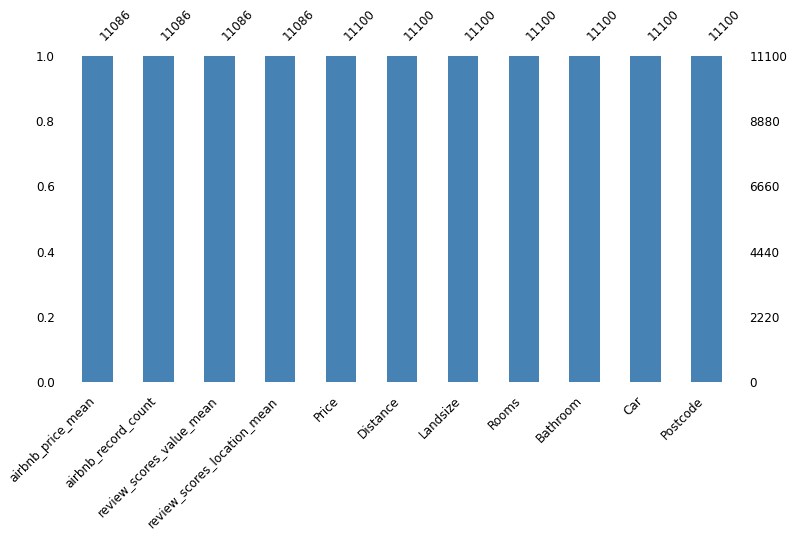

In [ ]:
msno.bar(melb_df_e_b_y[numerical_cols],figsize=(12, 6), sort="ascending",fontsize=12, color='steelblue') 

Observamos que las variables sin datos son 'airbnb_record_count','review_scores_value_mean','review_scores_location_mean'.
- Se observa que corresponden a los casos que la variable zipcode tampoco tenia informacion por lo que se pueden eliminar esos datos.

In [ ]:
print(melb_df_e_b_y.isna().sum())
print(f"Cant. Datos con null: {len(melb_df_e_b_y)}")
melb_df_e_b_y.dropna(subset=['airbnb_price_mean'],how='any',inplace=True)

print(melb_df_e_b_y.isna().sum())
print(f"Cant. Datos sin null: {len(melb_df_e_b_y)}")

Price                           0
Suburb                          0
Distance                        0
Regionname                      0
Postcode                        0
Landsize                        0
Rooms                           0
Bathroom                        0
Car                             0
airbnb_price_mean              14
airbnb_record_count            14
review_scores_value_mean       14
review_scores_location_mean    14
dtype: int64
Cant. Datos con null: 11100
Price                          0
Suburb                         0
Distance                       0
Regionname                     0
Postcode                       0
Landsize                       0
Rooms                          0
Bathroom                       0
Car                            0
airbnb_price_mean              0
airbnb_record_count            0
review_scores_value_mean       0
review_scores_location_mean    0
dtype: int64
Cant. Datos sin null: 11086


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
print(melb_df_e_b_y.isna().sum())

Price                          0
Suburb                         0
Distance                       0
Regionname                     0
Postcode                       0
Landsize                       0
Rooms                          0
Bathroom                       0
Car                            0
airbnb_price_mean              0
airbnb_record_count            0
review_scores_value_mean       0
review_scores_location_mean    0
dtype: int64


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


###Encoding

In [ ]:
melb_df_e_b_y
print(f"Var. Categoricas: {categorical_cols}")
print(f"Var. Numericas: {numerical_cols}")

Var. Categoricas: ['Suburb', 'Regionname']
Var. Numericas: ['Price', 'Distance', 'Landsize', 'Rooms', 'Bathroom', 'Car', 'airbnb_price_mean', 'airbnb_record_count', 'review_scores_value_mean', 'review_scores_location_mean', 'Postcode']


In [ ]:
melb_df_e_b_y[categorical_cols].nunique()

Suburb        278
Regionname      8
dtype: int64

se observa que hay muchos valores unicos por lo que se procede a curar, tomamos los 50 con mas valores

In [ ]:
melb_df_e_b_y['Suburb'].value_counts()

Reservoir           332
Bentleigh East      239
Preston             225
Brunswick           184
Richmond            183
                   ... 
Rockbank              1
Attwood               1
North Warrandyte      1
Plumpton              1
Kooyong               1
Name: Suburb, Length: 278, dtype: int64

In [ ]:
#suburbs = melb_df_e_b_y['Suburb'].value_counts()
#suburbs = suburbs.sort_values(ascending=False)[:50]
#suburbs = suburbs.index.values.tolist()

In [ ]:
#melb_df_e_b_y['Suburb'] = melb_df_e_b_y['Suburb'].map(lambda x: 'Other' if x not in suburbs else x)

Variable **Postcode** necesitamos realizarle una normalizacion

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler((0,5))
data = melb_df_e_b_y['Postcode'].to_numpy()
data = data.reshape(-1,1)
melb_df_e_b_y['Postcode'] = scaler.fit_transform(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


####**OneHotEncoder con pandas dummies**

Generamos variables dummys de las variables categoricas.

In [ ]:
cat_dummies = pd.get_dummies(melb_df_e_b_y[categorical_cols])
cat_dummies

,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,...,Suburb_Yarra Glen,Suburb_Yarraville,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
cols_dict = melb_df_e_b_y[numerical_cols].nunique().to_dict()
one_hot = OneHotEncoder(drop= "if_binary").fit(melb_df_e_b_y[numerical_cols])
cols_num_dummies =[]
for key in cols_dict.keys():
  for i in range(cols_dict[key]):
    cols_num_dummies.append(key + str(i))


num_dummies = pd.DataFrame(one_hot.transform(melb_df_e_b_y[numerical_cols]).toarray(), columns=cols_num_dummies)
num_dummies

,Price0,Price1,Price2,Price3,Price4,Price5,Price6,Price7,Price8,Price9,...,Postcode157,Postcode158,Postcode159,Postcode160,Postcode161,Postcode162,Postcode163,Postcode164,Postcode165,Postcode166
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Concatenamos las variables al dataframe

In [ ]:
melb_df_e_b_y_dummies = pd.concat([num_dummies,cat_dummies],axis=1).fillna(0)

In [ ]:
melb_df_e_b_y_dummies = melb_df_e_b_y_dummies
melb_df_e_b_y_dummies

,Price0,Price1,Price2,Price3,Price4,Price5,Price6,Price7,Price8,Price9,...,Suburb_Yarra Glen,Suburb_Yarraville,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Dado a que no tiene sentido codificar las variables numericas con un OneHotEncoding decidimos emplear un dataframe que solo tenga categoricas codificadas 

In [ ]:
melb_df_e_b_y_dummies = pd.concat([melb_df_e_b_y,cat_dummies],axis=1)
melb_df_e_b_y_dummies.drop(categorical_cols, axis=1)

,Price,Distance,Postcode,Landsize,Rooms,Bathroom,Car,airbnb_price_mean,airbnb_record_count,review_scores_value_mean,...,Suburb_Yarra Glen,Suburb_Yarraville,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,1480000.0,2.5,0.417706,202.0,2,1.0,1.0,130.624031,258.0,9.572115,...,0,0,0,0,1,0,0,0,0,0
1,1035000.0,2.5,0.417706,156.0,2,1.0,0.0,130.624031,258.0,9.572115,...,0,0,0,0,1,0,0,0,0,0
2,1465000.0,2.5,0.417706,134.0,3,2.0,0.0,130.624031,258.0,9.572115,...,0,0,0,0,1,0,0,0,0,0
3,850000.0,2.5,0.417706,94.0,3,2.0,1.0,130.624031,258.0,9.572115,...,0,0,0,0,1,0,0,0,0,0
4,1600000.0,2.5,0.417706,120.0,4,1.0,2.0,130.624031,258.0,9.572115,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11111,1245000.0,16.7,0.935162,652.0,4,2.0,2.0,124.026455,189.0,9.443609,...,0,0,0,0,0,0,1,0,0,0
11112,1031000.0,6.8,0.099751,333.0,3,2.0,2.0,191.094595,74.0,9.586957,...,0,0,0,0,0,0,0,0,1,0
11113,1170000.0,6.8,0.099751,436.0,3,2.0,4.0,191.094595,74.0,9.586957,...,0,0,0,0,0,0,0,0,1,0
11114,2500000.0,6.8,0.099751,866.0,4,1.0,5.0,191.094595,74.0,9.586957,...,0,0,0,0,0,0,0,0,1,0


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# estimator=KNeighborsRegressor()
melb_data_Kne = melb_df.copy(deep=True)

kne_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(), max_iter=30)
melb_data_Kne[['YearBuilt','BuildingArea']] = kne_imputer.fit_transform(
    melb_data_Kne[['YearBuilt', 'BuildingArea']])

# estimator=BayesianRidge()
melb_data_bay = melb_df.copy(deep=True)

bay_imputer = IterativeImputer(random_state=0, estimator=BayesianRidge(), max_iter=30)
melb_data_bay[['YearBuilt', 'BuildingArea']] = bay_imputer.fit_transform(
    melb_data_bay[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


### Variables antes de ser inputadas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


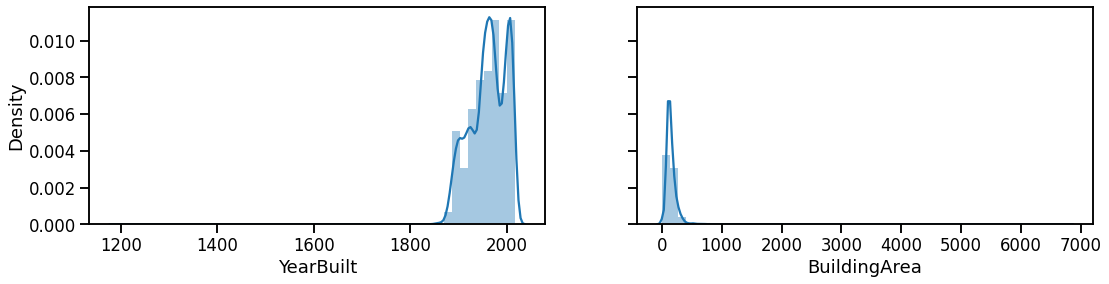

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4),sharey=True)
seaborn.distplot(melb_df['YearBuilt'],ax=ax1)
seaborn.distplot(melb_df['BuildingArea'],ax=ax2)

### Variables luego de ser inputadas

**estimador: KNeighborsRegressor**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


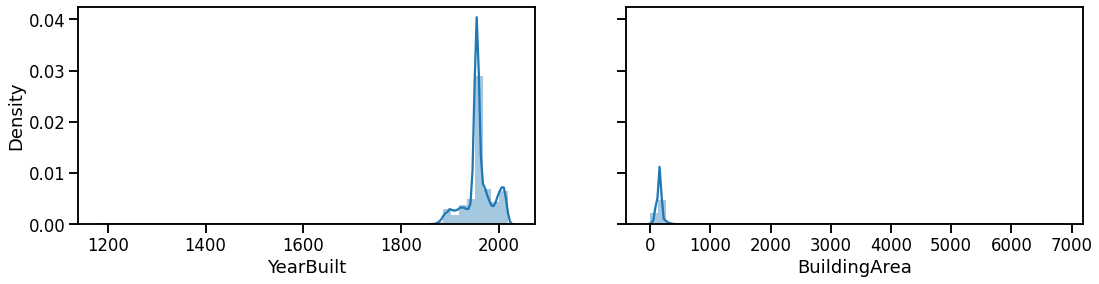

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4),sharey=True)
seaborn.distplot(melb_data_Kne['YearBuilt'],ax=ax1)
seaborn.distplot(melb_data_Kne['BuildingArea'],ax=ax2)

**estimador: BayesianRidge**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


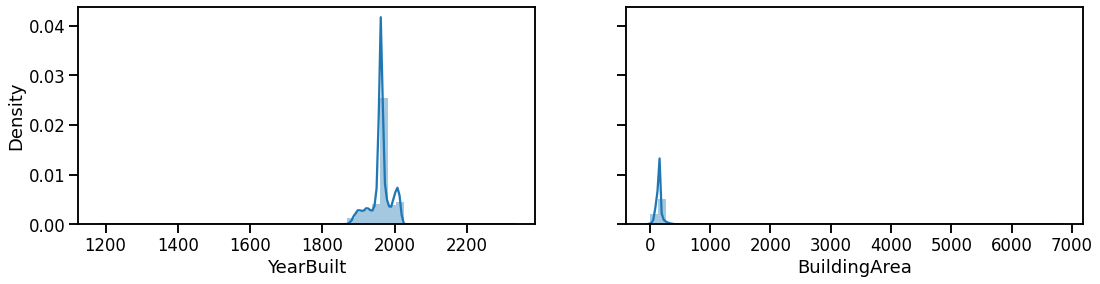

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4),sharey=True)
seaborn.distplot(melb_data_bay['YearBuilt'],ax=ax1)
seaborn.distplot(melb_data_bay['BuildingArea'],ax=ax2)

####Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

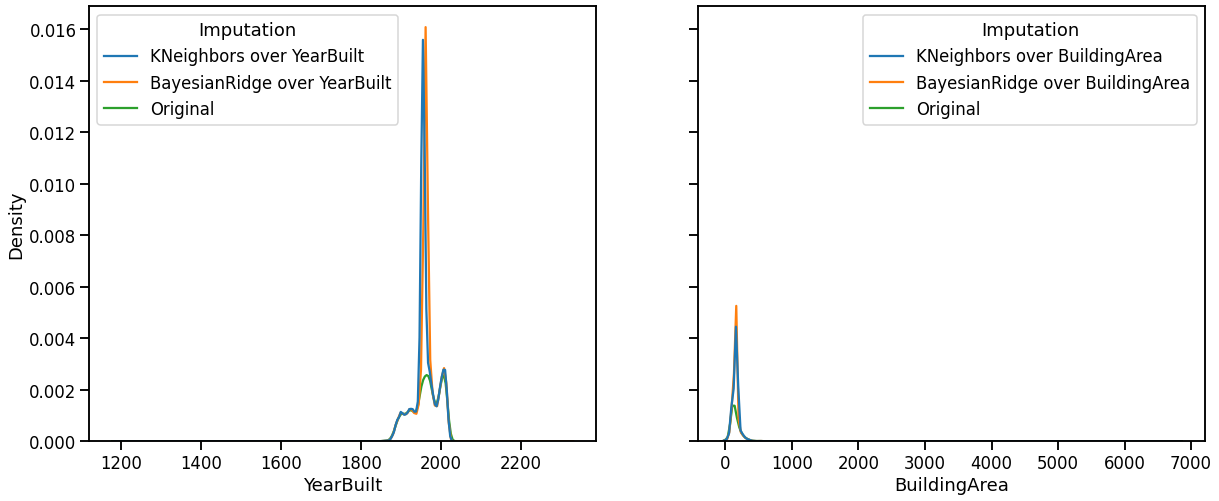

In [ ]:
#comparacion year
year_kne = melb_data_Kne.YearBuilt.to_frame()
year_kne['Imputation'] = 'KNeighbors over YearBuilt'
year_bay = melb_data_bay.YearBuilt.to_frame()
year_bay['Imputation'] = 'BayesianRidge over YearBuilt'
year_original = melb_df.YearBuilt.dropna().to_frame()
year_original['Imputation'] = 'Original'
data_year = pd.concat([year_kne,year_bay, year_original]).reset_index(drop=True)
#comparacion BuildingArea
builArea_kne = melb_data_Kne.BuildingArea.to_frame()
builArea_kne['Imputation'] = 'KNeighbors over BuildingArea'
builArea_bay = melb_data_bay.BuildingArea.to_frame()
builArea_bay['Imputation'] = 'BayesianRidge over BuildingArea'
builArea_original = melb_df.BuildingArea.dropna().to_frame()
builArea_original['Imputation'] = 'Original'
data_builArea = pd.concat([builArea_kne,builArea_bay, builArea_original]).reset_index(drop=True)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8),sharey=True)
g = seaborn.kdeplot(data=data_year, x='YearBuilt', hue='Imputation',ax=ax1)
g = seaborn.kdeplot(data=data_builArea, x='BuildingArea', hue='Imputation',ax=ax2)

### concateno columnas en dataframe principal

In [ ]:
melb_df_e_b_y_dummies['YearBuilt'] = year_kne['YearBuilt']
melb_df_e_b_y_dummies['BuildingArea'] = builArea_kne['BuildingArea']
melb_df_e_b_y_dummies

,Price,Suburb,Distance,Regionname,Postcode,Landsize,Rooms,Bathroom,Car,airbnb_price_mean,...,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,YearBuilt,BuildingArea
0,1480000.0,Abbotsford,2.5,Northern Metropolitan,0.417706,202.0,2,1.0,1.0,130.624031,...,0,0,1,0,0,0,0,0,1955.0,168.4
1,1035000.0,Abbotsford,2.5,Northern Metropolitan,0.417706,156.0,2,1.0,0.0,130.624031,...,0,0,1,0,0,0,0,0,1900.0,79.0
2,1465000.0,Abbotsford,2.5,Northern Metropolitan,0.417706,134.0,3,2.0,0.0,130.624031,...,0,0,1,0,0,0,0,0,1900.0,150.0
3,850000.0,Abbotsford,2.5,Northern Metropolitan,0.417706,94.0,3,2.0,1.0,130.624031,...,0,0,1,0,0,0,0,0,1955.0,168.4
4,1600000.0,Abbotsford,2.5,Northern Metropolitan,0.417706,120.0,4,1.0,2.0,130.624031,...,0,0,1,0,0,0,0,0,2014.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11111,1245000.0,Wheelers Hill,16.7,South-Eastern Metropolitan,0.935162,652.0,4,2.0,2.0,124.026455,...,0,0,0,0,1,0,0,0,1981.0,83.6
11112,1031000.0,Williamstown,6.8,Western Metropolitan,0.099751,333.0,3,2.0,2.0,191.094595,...,0,0,0,0,0,0,1,0,1995.0,133.0
11113,1170000.0,Williamstown,6.8,Western Metropolitan,0.099751,436.0,3,2.0,4.0,191.094595,...,0,0,0,0,0,0,1,0,1997.0,171.0
11114,2500000.0,Williamstown,6.8,Western Metropolitan,0.099751,866.0,4,1.0,5.0,191.094595,...,0,0,0,0,0,0,1,0,1920.0,157.0


## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [ ]:
X =  melb_df_e_b_y_dummies.copy().drop(categorical_cols,axis=1)
n = min(20, X.shape[0])
print(f'n = {n}')
X

n = 20


,Price,Distance,Postcode,Landsize,Rooms,Bathroom,Car,airbnb_price_mean,airbnb_record_count,review_scores_value_mean,...,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,YearBuilt,BuildingArea
0,1480000.0,2.5,0.417706,202.0,2,1.0,1.0,130.624031,258.0,9.572115,...,0,0,1,0,0,0,0,0,1955.0,168.4
1,1035000.0,2.5,0.417706,156.0,2,1.0,0.0,130.624031,258.0,9.572115,...,0,0,1,0,0,0,0,0,1900.0,79.0
2,1465000.0,2.5,0.417706,134.0,3,2.0,0.0,130.624031,258.0,9.572115,...,0,0,1,0,0,0,0,0,1900.0,150.0
3,850000.0,2.5,0.417706,94.0,3,2.0,1.0,130.624031,258.0,9.572115,...,0,0,1,0,0,0,0,0,1955.0,168.4
4,1600000.0,2.5,0.417706,120.0,4,1.0,2.0,130.624031,258.0,9.572115,...,0,0,1,0,0,0,0,0,2014.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11111,1245000.0,16.7,0.935162,652.0,4,2.0,2.0,124.026455,189.0,9.443609,...,0,0,0,0,1,0,0,0,1981.0,83.6
11112,1031000.0,6.8,0.099751,333.0,3,2.0,2.0,191.094595,74.0,9.586957,...,0,0,0,0,0,0,1,0,1995.0,133.0
11113,1170000.0,6.8,0.099751,436.0,3,2.0,4.0,191.094595,74.0,9.586957,...,0,0,0,0,0,0,1,0,1997.0,171.0
11114,2500000.0,6.8,0.099751,866.0,4,1.0,5.0,191.094595,74.0,9.586957,...,0,0,0,0,0,0,1,0,1920.0,157.0


In [ ]:
# Escalar para que las variables tengan el mismo peso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components= n)
X_pca = pca.fit_transform(X_std)
print("Principal components")
print(pca.components_)
print("Explained variance ratio")
print(pca.explained_variance_ratio_)

Principal components
[[ 2.67345656e-01 -3.07217954e-01  1.58163917e-01 ... -5.04434734e-02
  -1.75999952e-01 -1.97627736e-03]
 [ 2.24668213e-01  2.92743722e-01  3.50654090e-01 ...  7.05391894e-02
   7.61887129e-02  1.28530583e-01]
 [-2.45606238e-01  2.31285048e-01  2.80034230e-01 ...  1.57874732e-01
   5.23900101e-02 -1.13534257e-01]
 ...
 [-9.07203473e-03 -9.05615523e-03  2.74152762e-04 ... -5.18842532e-04
  -2.48209068e-03 -1.23050158e-01]
 [ 4.24317186e-02  1.72321709e-02 -8.69830903e-04 ... -4.94832913e-04
   1.33613306e-02 -3.84795087e-02]
 [-1.14911495e-02 -1.94348865e-03 -8.91160713e-04 ...  2.79988873e-04
  -1.22371654e-02  2.27639764e-03]]
Explained variance ratio
[0.01296682 0.01204965 0.00867956 0.00743568 0.00734392 0.00684702
 0.00671889 0.00670149 0.00659827 0.006076   0.00600021 0.00508391
 0.00441579 0.0041607  0.00376996 0.00348694 0.00341663 0.00338566
 0.00336674 0.00336338]


(0.0, 1.1)

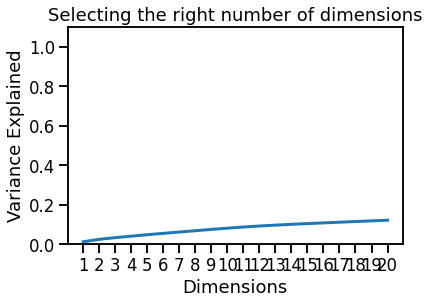

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.arange(len(cumsum))+1

plt.plot(dim,cumsum,'-',lw=3);

plt.xlabel('Dimensions')
plt.ylabel('Variance Explained')
plt.title('Selecting the right number of dimensions')

plt.xticks(range(1,21))
plt.ylim([0,1.1])

Vemos que la varianza explicada por cada componente es muy baja con lo que  no nod supondria una mejora considerable el incluirlas en el dataframe.
Procedemos a utilizar entonces un StandardScaler



In [ ]:
X_std = StandardScaler().fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_std)
print("Principal components")
print(pca.components_)
print("Explained variance ratio")
print(pca.explained_variance_ratio_)

Principal components
[[ 2.67346115e-01 -3.07221651e-01  1.58165694e-01 ... -5.04435204e-02
  -1.75999005e-01 -1.97598515e-03]
 [ 2.24664434e-01  2.92744287e-01  3.50660570e-01 ...  7.05356190e-02
   7.61943594e-02  1.28535016e-01]
 [-2.45611599e-01  2.31291443e-01  2.80051504e-01 ...  1.57877002e-01
   5.23706245e-02 -1.13459339e-01]
 ...
 [-1.76822003e-42  4.53114758e-16  2.57522545e-01 ... -3.04962320e-01
   1.38777878e-17  1.94289029e-16]
 [ 0.00000000e+00 -7.02840784e-17  2.97716222e-01 ...  5.27230705e-02
   1.72604986e-16 -8.32667268e-17]
 [ 0.00000000e+00  3.07344211e-16 -9.85072881e-02 ...  2.69570270e-01
  -2.77555756e-17  8.32667268e-17]]
Explained variance ratio
[1.29668212e-02 1.20496489e-02 8.67960138e-03 7.43617351e-03
 7.34436223e-03 6.84828127e-03 6.72087002e-03 6.70320675e-03
 6.60001338e-03 6.08296783e-03 6.00682508e-03 5.12911957e-03
 4.54909618e-03 4.43058150e-03 4.13892589e-03 3.76186031e-03
 3.69401182e-03 3.61216584e-03 3.49739096e-03 3.42774312e-03
 3.41694802e-

(0.0, 1.1)

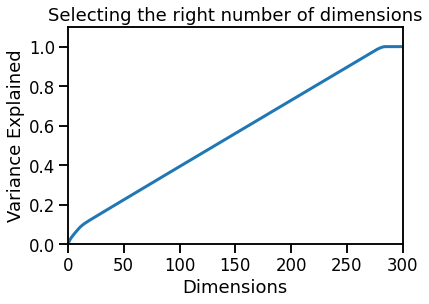

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.arange(len(cumsum))+1

plt.plot(dim,cumsum,'-',lw=3);

plt.xlabel('Dimensions')
plt.ylabel('Variance Explained')
plt.title('Selecting the right number of dimensions')
plt.xlim([0, 300])
plt.ylim([0,1.1])

Se observa recien que con las primeras 100 componentes recien se tendria una varianza acumulada significativa. Consideramos conservar solo las 3 primeras componentes principales ya que pueden ser utiles a los fines de visualizacion permitiendo enriquecer el analisis.

In [ ]:
Xpca_df = pd.DataFrame(X_pca)
for i in Xpca_df.columns.values:
  Xpca_df.rename(columns = {i:f'pca_col_{i}'}, inplace = True)

In [ ]:
Xpca_df

,pca_col_0,pca_col_1,pca_col_2,pca_col_3,pca_col_4,pca_col_5,pca_col_6,pca_col_7,pca_col_8,pca_col_9,...,pca_col_289,pca_col_290,pca_col_291,pca_col_292,pca_col_293,pca_col_294,pca_col_295,pca_col_296,pca_col_297,pca_col_298
0,1.992908,-2.841136,1.070077,-0.619972,-0.350299,-0.302753,-0.042935,-0.035076,0.281323,0.477494,...,7.294692e-15,-2.803257e-15,-3.099441e-15,1.836153e-15,5.044886e-15,1.542584e-15,-1.229887e-15,-4.963443e-15,3.929609e-16,-3.700554e-16
1,2.246596,-3.498987,1.379826,-0.477575,-0.114492,-0.001080,-0.051063,-0.014993,-0.203034,0.389073,...,-4.835832e-15,-7.623193e-15,8.772276e-15,-4.596135e-16,1.553798e-15,2.282791e-15,3.775885e-15,-2.505590e-16,-2.896956e-15,3.087433e-15
2,2.381574,-2.576821,0.644093,-0.790575,-0.595068,-0.469414,-0.136459,-0.025943,0.475969,1.037428,...,-2.167188e-15,6.404784e-15,3.361288e-15,1.344507e-15,-7.726255e-17,-4.593857e-17,1.789097e-15,3.252967e-15,1.135864e-15,-3.588658e-15
3,1.635460,-2.485442,0.889713,-0.650522,-0.604387,-0.534722,-0.120468,-0.043727,0.692908,0.776505,...,9.711860e-18,1.013599e-15,3.126739e-15,-4.608980e-16,1.183438e-15,-1.185012e-15,7.013788e-16,1.437302e-15,-1.428120e-15,-1.730673e-15
4,1.409700,-1.922043,0.629944,-0.789604,-0.775637,-0.801819,-0.079199,-0.049822,1.086752,0.776478,...,-2.526277e-17,-5.519517e-16,-1.205703e-15,1.312656e-15,1.078793e-15,-1.103596e-15,-2.768808e-16,2.658908e-16,-1.179406e-15,1.320542e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11081,-1.319547,2.750177,2.100011,1.242359,0.885128,-5.445390,-1.040636,0.327217,-2.707637,3.805627,...,-5.785907e-16,-6.148719e-18,-1.871396e-15,-1.822749e-15,4.232477e-16,-3.815077e-16,4.286896e-16,4.915861e-17,2.381521e-18,-1.596984e-16
11082,-0.096250,-0.947174,-2.247763,1.615642,-0.463546,-0.062889,-0.003865,-0.144331,0.295368,1.712590,...,4.877967e-16,-1.847738e-17,-5.332214e-16,3.592320e-16,-6.411121e-16,-9.393871e-16,-3.274479e-16,2.640274e-16,-2.617350e-17,5.704154e-17
11083,-0.324687,-0.377616,-2.576729,1.445957,-0.662849,-0.406185,0.070161,-0.174637,0.728804,1.894882,...,1.833318e-16,-8.314325e-17,-1.300449e-16,2.788804e-16,-2.238739e-16,-4.325609e-16,-4.035568e-16,5.073307e-17,2.538634e-16,-2.317631e-16
11084,0.445568,0.320392,-3.388311,0.934786,-0.948886,-0.743316,0.206594,-0.194095,0.956499,2.524817,...,-4.359935e-16,-3.966001e-17,3.797679e-16,-2.326569e-16,1.019904e-15,7.071101e-16,2.439520e-16,1.603899e-16,1.113922e-16,-1.552924e-16


## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

melb_df_4 = melb_df.copy()
melb_df_4.drop(columns= ['BuildingArea','YearBuilt'],inplace=True)
melb_df_4['Car'] = melb_df_4['Car'].fillna(0)
melb_df_4.dropna(axis=0,inplace=True)
## If we process our data with the following steps:
categorical_cols = ['Suburb','Regionname']
numerical_cols = ['Price','Distance','Landsize','Rooms','Bathroom','Car','airbnb_price_mean',
                  'airbnb_record_count','review_scores_value_mean','review_scores_location_mean','Postcode']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df_4[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = np.hstack([X_cat, melb_df_4[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))


Matrix has shape (11102, 286), with columns: ['Suburb=Abbotsford', 'Suburb=Aberfeldie', 'Suburb=Airport West', 'Suburb=Albanvale', 'Suburb=Albert Park', 'Suburb=Albion', 'Suburb=Alphington', 'Suburb=Altona', 'Suburb=Altona Meadows', 'Suburb=Altona North', 'Suburb=Armadale', 'Suburb=Ascot Vale', 'Suburb=Ashburton', 'Suburb=Ashwood', 'Suburb=Aspendale', 'Suburb=Aspendale Gardens', 'Suburb=Attwood', 'Suburb=Avondale Heights', 'Suburb=Balaclava', 'Suburb=Balwyn', 'Suburb=Balwyn North', 'Suburb=Bayswater', 'Suburb=Bayswater North', 'Suburb=Beaumaris', 'Suburb=Bellfield', 'Suburb=Bentleigh', 'Suburb=Bentleigh East', 'Suburb=Black Rock', 'Suburb=Blackburn', 'Suburb=Blackburn North', 'Suburb=Blackburn South', 'Suburb=Bonbeach', 'Suburb=Boronia', 'Suburb=Box Hill', 'Suburb=Braybrook', 'Suburb=Briar Hill', 'Suburb=Brighton', 'Suburb=Brighton East', 'Suburb=Broadmeadows', 'Suburb=Brookfield', 'Suburb=Brooklyn', 'Suburb=Brunswick', 'Suburb=Brunswick East', 'Suburb=Brunswick West', 'Suburb=Bulleen'

In [ ]:
# Step 3: Append some new features, like PCA
pca = PCA(n_components=3)
pca_dummy_features = pca.fit_transform(X)
X_pca = np.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2', 'pca3'])

In [ ]:
## Re-build dataframe
processed_melb_df = pd.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

,Suburb=Abbotsford,Suburb=Aberfeldie,Suburb=Airport West,Suburb=Albanvale,Suburb=Albert Park,Suburb=Albion,Suburb=Alphington,Suburb=Altona,Suburb=Altona Meadows,Suburb=Altona North,...,Bathroom,Car,airbnb_price_mean,airbnb_record_count,review_scores_value_mean,review_scores_location_mean,Postcode,pca1,pca2,pca3
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,130.624031,258.0,9.572115,9.697115,3067.0,354165.168370,-342.110120,96.579719
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,130.624031,258.0,9.572115,9.697115,3067.0,-90834.833240,-357.533759,108.509804
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,130.624031,258.0,9.572115,9.697115,3067.0,339165.163591,-408.805726,91.090348
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,130.624031,258.0,9.572115,9.697115,3067.0,-275834.836956,-406.643898,109.665092
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,130.624031,258.0,9.572115,9.697115,3067.0,474165.162092,-431.964883,84.990148


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
